https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/notebooks?competitionId=13385&sortBy=voteCount

# Load Data

In [27]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

import lightgbm
import xgboost

import matplotlib.pyplot as plt
import seaborn as sns

print('Ïñçüí¢')

import missingno
import sklearn

print(xgboost.__version__)
print(lightgbm.__version__)
print(missingno.__version__)
print(sklearn.__version__)

def rmse_with_log(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

Ïñçüí¢
1.4.2
3.3.0
0.5.0
1.0


In [28]:
data_dir ='~/aiffel/kaggle_kakr_housing/data'
# hint : os.getenvÎ•º ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò ÏßÅÏ†ë Í≤ΩÎ°úÎ•º ÏûëÏÑ±

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv')      # ÌÖåÏä§Ìä∏, Ï¶â submission Ïãú ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú
submission_path = join(data_dir, 'sample_submission.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
submission = pd.read_csv(submission_path)
train.shape, test.shape, submission.shape

((15035, 21), (6468, 20), (6468, 2))

In [29]:
train.isna().sum().sum(), test.isna().sum().sum()

(0, 0)

In [30]:
def load_data():
    data_dir ='~/aiffel/kaggle_kakr_housing/data'
    # hint : os.getenvÎ•º ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò ÏßÅÏ†ë Í≤ΩÎ°úÎ•º ÏûëÏÑ±

    train_data_path = join(data_dir, 'train.csv')
    test_data_path = join(data_dir, 'test.csv')      # ÌÖåÏä§Ìä∏, Ï¶â submission Ïãú ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú
    submission_path = join(data_dir, 'sample_submission.csv')

    train = pd.read_csv(train_data_path)
    test = pd.read_csv(test_data_path)
    submission = pd.read_csv(submission_path)
    
    return train, test, submission

# EDA

<AxesSubplot:>

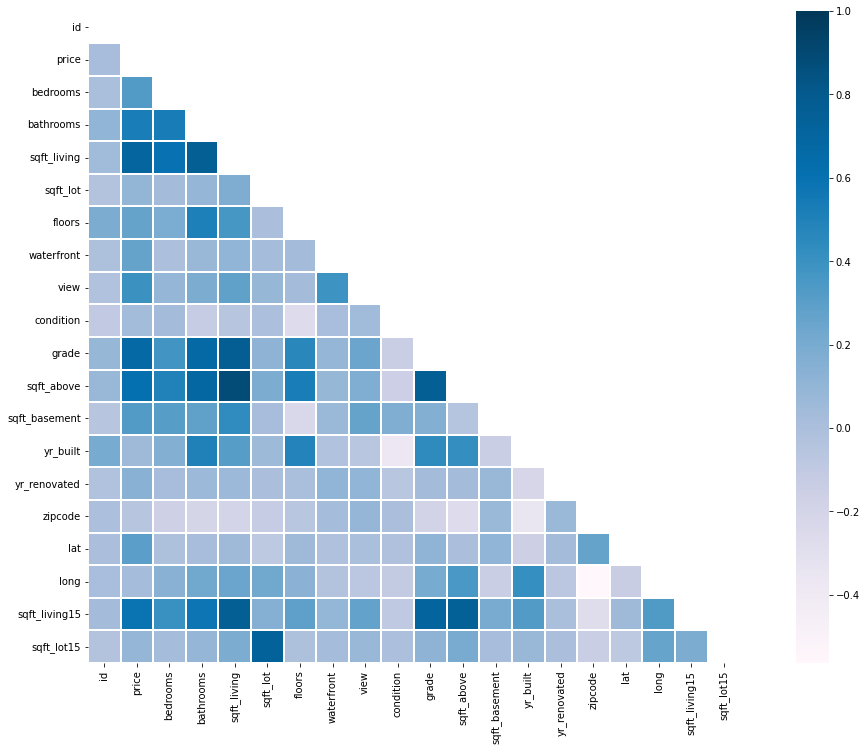

In [31]:
colormap = plt.cm.PuBu

mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 12))
sns.heatmap(train.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", 
            annot = False, annot_kws = {"size" : 16}, mask=mask)

In [32]:
train.describe().round()

id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count  15035.0    15035.0   15035.0    15035.0      15035.0    15035.0   
mean    7517.0   540683.0       3.0        2.0       2084.0    15297.0   
std     4340.0   371525.0       1.0        1.0        922.0    42613.0   
min        0.0    78000.0       0.0        0.0        290.0      520.0   
25%     3758.0   322000.0       3.0        2.0       1430.0     5028.0   
50%     7517.0   450000.0       3.0        2.0       1910.0     7620.0   
75%    11276.0   645000.0       4.0        2.0       2560.0    10696.0   
max    15034.0  7700000.0      10.0        8.0      13540.0  1651359.0   

        floors  waterfront     view  condition    grade  sqft_above  \
count  15035.0     15035.0  15035.0    15035.0  15035.0     15035.0   
mean       1.0         0.0      0.0        3.0      8.0      1794.0   
std        1.0         0.0      1.0        1.0      1.0       832.0   
min        1.0         0.0      0.0        1.0      1.0       290.0   
25%        1.0         0.0      0.0        3.0      7.0      1190.0   
50%        2.0         0.0      0.0        3.0      7.0      1570.0   
75%        2.0         0.0      0.0        4.0      8.0      2230.0   
max        4.0         1.0      4.0        5.0     13.0      9410.0   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
count        15035.0   15035.0       15035.0  15035.0  15035.0  15035.0   
mean           290.0    1971.0          84.0  98078.0     48.0   -122.0   
std            441.0      29.0         400.0     53.0      0.0      0.0   
min              0.0    1900.0           0.0  98001.0     47.0   -123.0   
25%              0.0    1951.0           0.0  98033.0     47.0   -122.0   
50%              0.0    1975.0           0.0  98065.0     48.0   -122.0   
75%            550.0    1997.0           0.0  98117.0     48.0   -122.0   
max           4130.0    2015.0        2015.0  98199.0     48.0   -121.0   

       sqft_living15  sqft_lot15  
count        15035.0     15035.0  
mean          1993.0     12824.0  
std            691.0     27736.0  
min            399.0       651.0  
25%           1490.0      5100.0  
50%           1850.0      7610.0  
75%           2360.0     10076.0  
max           6210.0    871200.0

In [33]:
train['isExpensive'] = train['price'] > 645000.0

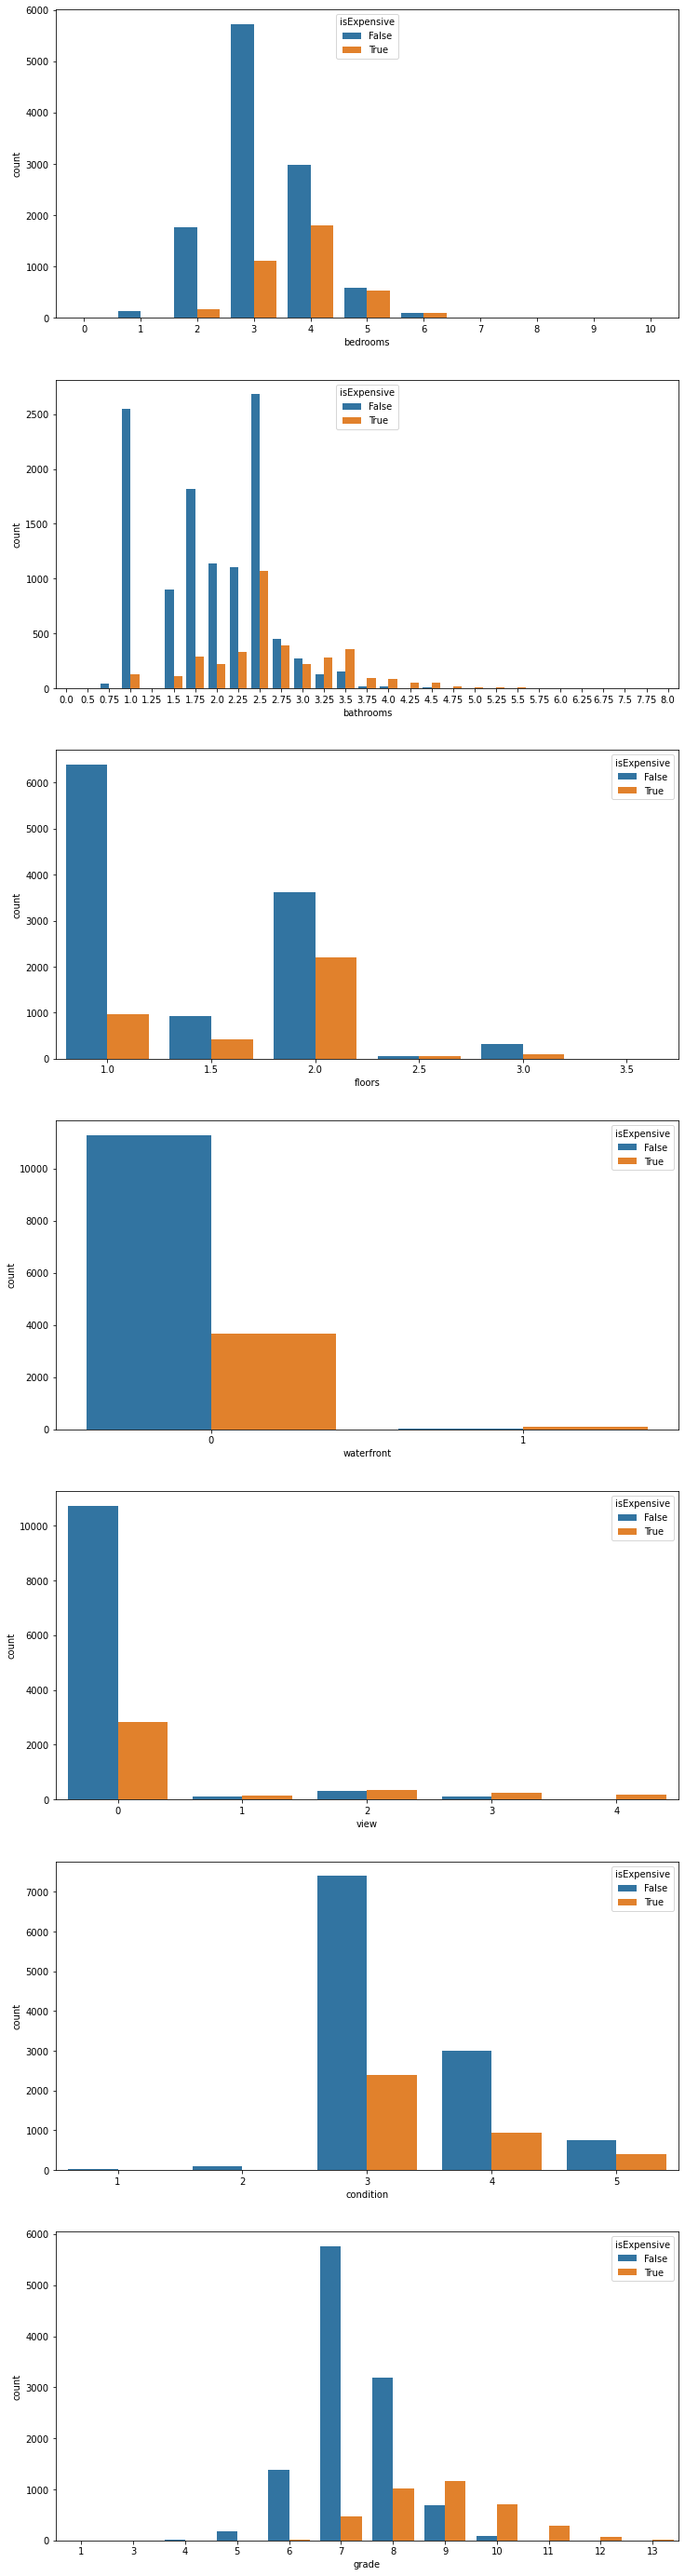

In [34]:
cat_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

fig, axes = plt.subplots(len(cat_cols), 1, figsize=(12, 50))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=train, x=col, ax=axes[i], hue='isExpensive')

- category col    

conditionÏùò Í≤ΩÏö∞ 1 or 2Ïùº ÎïåÎäî Î¨¥Ï°∞Í±¥ ÏååÎã§.    
Í∑∏ Ïô∏Ïùò Î∂ÑÌè¨ÏóêÎäî Ï∞®Ïù¥Í∞Ä Î≥¥Ïù¥ÏßÄ ÏïäÏùåÏúºÎ°ú 1,2 Ïó¨Î∂ÄÎ°ú Î∞îÍøîÏ§òÎèÑ Ï¢ãÏùÑ Í≤É Í∞ôÎã§.
    
gradeÎäî ÌôïÏã§Ìûà Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇ®.

- continuous col   
   
    -lotÏùò Í≤ΩÏö∞ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎèÑ ÎÇÆÍ≥†, ÏßÅÍ¥ÄÏ†ÅÏúºÎ°úÎèÑ ÏßëÍ∞íÏóêÎäî ÌÅ∞ ÏòÅÌñ•Ïù¥ ÏóÜÏùÑ ÎìØ ÌïòÎã§.   

    -yr_build - yr_reno : ÏóÖÎç∞Ïù¥Ìä∏ Ï£ºÍ∏∞   
    -max(yr_build) - yr_build : ÎÖ∏ÌôîÏ†ïÎèÑ   



# Feature Selection

In [35]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'isExpensive'],
      dtype='object')

In [36]:
train['zipcode'].value_counts()

98103    421
98038    420
98115    408
98052    408
98117    387
        ... 
98102     75
98010     63
98024     54
98148     44
98039     36
Name: zipcode, Length: 70, dtype: int64

In [37]:
# ÏùòÎØ∏ÏóÜÎã§Í≥† ÌåêÎã®ÎêòÎäî ÌîºÏ≤ò
non_ftrs = ['lat', 'long', 'zipcode', 'sqft_lot', 'sqft_lot15']

# Feature Engineering

In [38]:
# condition 1,2 Ïó¨Î∂Ä
train['low_condition'] = train['condition'] < 3

In [39]:
# ÏóÖÎç∞Ïù¥Ìä∏ Ï£ºÍ∏∞
train['Update'] = abs(train['yr_renovated'] - train['yr_built'])

In [40]:
# ÎÖ∏ÌôîÏ†ïÎèÑ
train['aging'] = max(train['yr_built']) - train['yr_built']

# Data Preprocessing

In [138]:
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

y = train['price']
train = train.drop(['price'], axis=1)

# ÏùòÎØ∏ÏóÜÎã§Í≥† ÌåêÎã®ÎêòÎäî ÌîºÏ≤ò
# non_ftrs = ['lat', 'long', 'zipcode', 'date', 'id']
# ÎèåÎ†§Î≥¥ÎãàÍπå latÏù¥Îûë longÏùÄ ÏÑ±Îä•Ìñ•ÏÉÅÏóê ÎèÑÏõÄÏù¥ Îê®! Í∑∏Í≤ÉÎèÑ ÎßéÏù¥...
non_ftrs = ['id', 'zipcode', 'date', 'sqft_lot15', 'sqft_living15']

train['date'] = train['date'].apply(lambda x : str(x[:6]))


train.drop(non_ftrs, axis=1, inplace=True)
test.drop(non_ftrs, axis=1, inplace=True)

# condition 1,2 Ïó¨Î∂Ä
# train['low_condition'] = train['condition'] < 3
# test['low_condition'] = test['condition'] < 3
# ÏóÖÎç∞Ïù¥Ìä∏ Ï£ºÍ∏∞
train['Update'] = abs(train['yr_renovated'] - train['yr_built'])
test['Update'] = abs(test['yr_renovated'] - test['yr_built'])
# ÎÖ∏ÌôîÏ†ïÎèÑ
train['aging'] = max(train['yr_built']) - train['yr_built']
test['aging'] = abs(test['yr_built'] - test['yr_built'])

# # ÏõêÌï´Ïù∏ÏΩîÎî©
# cat_cols = ['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
# # categoryÎ•º stringÏúºÎ°ú Î∞îÍæ∏Í∏∞
# train[cat_cols] = train[cat_cols].astype(str)
# test[cat_cols] = test[cat_cols].astype(str)

# train = pd.get_dummies(train, drop_first=True)
# test = pd.get_dummies(test, drop_first=True)

In [42]:
train.shape, test.shape, y.shape

((15035, 19), (6468, 19), (15035,))

In [145]:
def load_preprocessed_data():
    train, test, sub = load_data()

    y = train['price']
    train = train.drop(['price'], axis=1)

    # ÏùòÎØ∏ÏóÜÎã§Í≥† ÌåêÎã®ÎêòÎäî ÌîºÏ≤ò
    # non_ftrs = ['lat', 'long', 'zipcode', 'date', 'id']
    # ÎèåÎ†§Î≥¥ÎãàÍπå latÏù¥Îûë longÏùÄ ÏÑ±Îä•Ìñ•ÏÉÅÏóê ÎèÑÏõÄÏù¥ Îê®! Í∑∏Í≤ÉÎèÑ ÎßéÏù¥...
    non_ftrs = ['id', 'zipcode', 'date', 'sqft_lot15', 'sqft_living15']

    train['date'] = train['date'].apply(lambda x : str(x[:6]))

    train.drop(non_ftrs, axis=1, inplace=True)
    test.drop(non_ftrs, axis=1, inplace=True)
    
    skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

    for c in skew_columns:
        train[c] = np.log1p(train[c].values)
        test[c] = np.log1p(test[c].values)

    # condition 1,2 Ïó¨Î∂Ä -> ÏÑ±Îä•ÌïòÎùΩ, Ï†úÏô∏ÌïòÍ∏∞Î°ú
#     train['low_condition'] = train['condition'] < 3
#     test['low_condition'] = test['condition'] < 3
    # ÏóÖÎç∞Ïù¥Ìä∏ Ï£ºÍ∏∞
    train['Update'] = abs(train['yr_renovated'] - train['yr_built'])
    test['Update'] = abs(test['yr_renovated'] - test['yr_built'])
    # ÎÖ∏ÌôîÏ†ïÎèÑ
    train['aging'] = max(train['yr_built']) - train['yr_built']
    test['aging'] = abs(test['yr_built'] - test['yr_built'])
    
    
    y_log = np.log1p(y)
    
    return train, y_log, test, sub

In [44]:
train, y, test, sub = load_preprocessed_data()
train.shape, y.shape, test.shape, sub.shape

((15035, 19), (15035,), (6468, 19), (6468, 2))

# Baseline Model

In [139]:
tr_X, ts_X, tr_y, ts_y = train_test_split(train, y.values, test_size=0.2, random_state=2023)

In [140]:
lightgbm = lgb.LGBMRegressor(random_state=2019)

lightgbm.fit(tr_X, tr_y)

pred = lightgbm.predict(ts_X)

rmse(pred, ts_y)

133513.07606763596

In [141]:
# gboost = GradientBoostingRegressor(random_state=2019) # Ïöî ÎÖÄÏÑùÎèÑ Î∫¥ÎäîÍ≤å Ï¢ãÎã§.
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':xgboost, 'name':'XGBoost'}, {'model':lightgbm, 'name':'LightGBM'}]

In [142]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

In [143]:
pred = AveragingBlending(models, tr_X, tr_y, ts_X)
rmse(pred, ts_y)

124863.0186255937

## ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞, Î™®Îç∏ 

Îç∞Ïù¥ÌÑ∞ 
- drop_features : ['id', 'zipcode', 'date']
- feature_engineering : low_condition(condition 1, 2 Ïó¨Î∂Ä) , aging(ÏßÄÏñ¥ÏßÑ Ïó∞Ïàò), Update(Î¶¨Î™®Îç∏ÎßÅ Îêú Ïó∞Ïàò)

Î™®Îç∏
- AvgBlending model

In [146]:
train, y, test, sub = load_preprocessed_data()

In [148]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':xgboost, 'name':'XGBoost'}, {'model':lightgbm, 'name':'LightGBM'}]

tr_X, ts_X, tr_y, ts_y = train_test_split(train, y.values, test_size=0.2, random_state=2023)
pred = AveragingBlending(models, tr_X, tr_y, ts_X)
pred = np.expm1(pred)
ts_y = np.expm1(ts_y)
rmse(pred, ts_y)

114651.3770073626

# Experiment

## category Í∞íÏùÑ ÏõêÌï´Ïù∏ÏΩîÎî© Ìï†Íπå , ÏïÑÎãàÎ©¥ label encoding ÎêúÏ±ÑÎ°ú ÏÇ¨Ïö©Ìï†Íπå?
- Î∞îÍæº Í≤É : 137374 / ÏïàÎ∞îÍæº Í≤É : 133415
- Í≤∞Î°†: Î∞îÍæ∏ÏßÄ ÎßêÏûê

In [22]:
train, test, _ = load_data()

y = train['price']
train = train.drop(['price'], axis=1)

# ÏùòÎØ∏ÏóÜÎã§Í≥† ÌåêÎã®ÎêòÎäî ÌîºÏ≤ò
# non_ftrs = ['lat', 'long', 'zipcode', 'date', 'id']
non_ftrs = ['id', 'zipcode', 'date']

train.drop(non_ftrs, axis=1, inplace=True)
test.drop(non_ftrs, axis=1, inplace=True)

# condition 1,2 Ïó¨Î∂Ä
train['low_condition'] = train['condition'] < 3
test['low_condition'] = test['condition'] < 3
# ÏóÖÎç∞Ïù¥Ìä∏ Ï£ºÍ∏∞
train['Update'] = abs(train['yr_renovated'] - train['yr_built'])
test['Update'] = abs(test['yr_renovated'] - test['yr_built'])
# ÎÖ∏ÌôîÏ†ïÎèÑ
train['aging'] = max(train['yr_built']) - train['yr_built']
test['aging'] = abs(test['yr_built'] - test['yr_built'])

# ÏõêÌï´Ïù∏ÏΩîÎî©
cat_cols = ['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
## categoryÎ•º stringÏúºÎ°ú Î∞îÍæ∏Í∏∞
train[cat_cols] = train[cat_cols].astype(str)
test[cat_cols] = test[cat_cols].astype(str)
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

tr_X, ts_X, tr_y, ts_y = train_test_split(train, y.values, test_size=0.2, random_state=2023)
lightgbm = lgb.LGBMRegressor(random_state=2019)
lightgbm.fit(tr_X, tr_y)
pred = lightgbm.predict(ts_X)
rmse(pred, ts_y)

137374.59544617627

## Average Blending > Single Model
- Îã®ÏàúÌûà Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º ÌèâÍ∑†Ìïú Í≤∞Í≥ºÍ∞Ä Îã®ÏùºÎ™®Îç∏Î≥¥Îã§ Îçî Ï¢ãÎã§   
- 127625 > 133415

##  log Ìï®ÏàòÎ°ú Ï†ïÍ∑úÎ∂ÑÌè¨Î°ú Í∑ºÏÇ¨ÏãúÏºúÏ§òÏïºÌïòÎÇò?
- Î∞îÍæº Í≤É : 117164 / ÏïàÎ∞îÍæº Í≤É : 133415
- Î∞îÍæºÍ≤å Îçî Ï¢ãÎã§

In [164]:
train, _, _ = load_data()

y = train['price']
train = train.drop(['price'], axis=1)

# ÏùòÎØ∏ÏóÜÎã§Í≥† ÌåêÎã®ÎêòÎäî ÌîºÏ≤ò
# non_ftrs = ['lat', 'long', 'zipcode', 'date', 'id']
non_ftrs = ['id', 'zipcode', 'date']

train.drop(non_ftrs, axis=1, inplace=True)

skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    train[c] = np.log1p(train[c].values)

y_log = np.log1p(y)

tr_X, ts_X, tr_y, ts_y = train_test_split(train, y_log, test_size=0.2, random_state=2017)

xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [
    {'model':xgboost, 'name':'XGBoost'}, 
    {'model':lightgbm, 'name':'LightGBM'}
]

pred = AveragingBlending(models, tr_X, tr_y, ts_X)
pred = np.expm1(pred)
ts_y = np.expm1(ts_y)
rmse(pred, ts_y)

107373.25247172016

## ÌÜµÍ≥ÑÍ∞í(min, max, mean)ÏùÑ Ï∂îÍ∞ÄÌïòÎ©¥ ÏÑ±Îä•Ïù¥ Ï¶ùÍ∞ÄÌï†Íπå?
- Î∞îÍæº Í≤É : 119878 / ÏïàÎ∞îÍæº Í≤É : 117164
- Î∞îÍæ∏ÏßÄ ÎßêÏûê

## Í∏∞ÌÉÄ ÌîºÏ≤ò Ï∂îÍ∞ÄÌï¥Î≥¥Í∏∞
- Î∞îÍæº Í≤É : 114166 / ÏïàÎ∞îÍæº Í≤É : 112773

In [162]:
train, _, _ = load_data()

y = train['price']
train = train.drop(['price'], axis=1)

# ÏùòÎØ∏ÏóÜÎã§Í≥† ÌåêÎã®ÎêòÎäî ÌîºÏ≤ò
# non_ftrs = ['lat', 'long', 'zipcode', 'date', 'id']
non_ftrs = ['id', 'zipcode', 'date', 'sqft_lot15', 'sqft_living15']

train.drop(non_ftrs, axis=1, inplace=True)

skew_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
for c in skew_columns:
    train[c] = np.log1p(train[c].values)

# Ïû¨Í∞úÎ∞úÎêú Ïó∞ÎèÑÍ∞Ä ÏóÜÏúºÎ©¥ ÏßÄÏùÄ Ïó∞ÎèÑÎ°ú Î∞îÍøîÏ£ºÍ∏∞ 
train['yr_renovated'] = train['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
train['yr_renovated'] = train['yr_renovated'].fillna(train['yr_built'])

# Î∞©Ïùò Í∞úÏàò
train['total_rooms'] = train['bedrooms'] + train['bathrooms']
# Î∞©Ïùò ÎπÑÏú® 
train['sqft_ratio'] = train['sqft_living'] / train['sqft_lot']
# Î∞©Ïùò Ï†ÑÏ≤¥ ÏÇ¨Ïù¥Ï¶à
train['sqft_total_size'] = train['sqft_living'] + train['sqft_lot'] + train['sqft_above'] + train['sqft_basement']
# Ïû¨Í∞úÎ∞úÏù¥ ÎêòÏóàÎäîÏßÄ Ïó¨Î∂Ä
train['is_renovated'] = train['yr_renovated'] - train['yr_built']
train['is_renovated'].apply(lambda x: 0 if x == 0 else 1)
# ÏÉùÏÇ∞Îêú ÌõÑ Ïó∞Ïàò 
train['aging'] = max(train['yr_built']) - train['yr_built']

y_log = np.log1p(y)

tr_X, ts_X, tr_y, ts_y = train_test_split(train, y_log, test_size=0.2, random_state=2017)

xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [
    {'model':xgboost, 'name':'XGBoost'}, 
    {'model':lightgbm, 'name':'LightGBM'}
]

pred = AveragingBlending(models, tr_X, tr_y, ts_X)
pred = np.expm1(pred)
ts_y = np.expm1(ts_y)
rmse(pred, ts_y)

108850.09413139313

# Tuning

https://smecsm.tistory.com/133

In [24]:
train, y, test, sub = load_preprocessed_data()

In [25]:
from sklearn.model_selection import GridSearchCV

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=-1):
    grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=3, verbose=1, n_jobs=5)
    grid_model.fit(train, y)
    
    params = grid_model.cv_results_['params']
    results = pd.DataFrame(params)
    score = grid_model.cv_results_['mean_test_score']
    results['score'] = score
    
    results['RMSE'] = np.sqrt(-1 * results['score'])
    results = results.rename(columns={'RMSE': 'RMSLE'})
    results = results.sort_values(by=['RMSLE'])
    
    return results

In [26]:
model = lgb.LGBMRegressor(random_state=2023)

param_grid = {
    'n_estimators': list(range(50, 100, 10)),
    'max_depth': list(range(2, 20, 2)),
    'num_leaves': list(range(5, 50, 5))
}

my_GridSearch(model, train, y, param_grid)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


KeyboardInterrupt: 

In [ ]:
model = xgb.XGBRegressor(random_state=2023)

param_grid = {
    'n_estimators': [100],
    'max_depth': list(range(3, 10, 2)),
    'min_child_weight': list(range(3, 20, 5)),
    'learning_rate': np.array(list(range(10, 20, 2))) * 0.01
}

my_GridSearch(model, train, y, param_grid)

In [ ]:
train, y, test, sub = load_preprocessed_data()
tr_X, ts_X, tr_y, ts_y = train_test_split(train, y.values, test_size=0.2, random_state=2023)

In [ ]:
# 1. ÏµúÏ†ÅÏùò max_depth Ï∞æÍ∏∞ -> 12
for i in range(5, 20):
    lgbm_param = {
    'n_estimators': 1000,
    'max_depth': i
    }
    lightgbm = lgb.LGBMRegressor(**lgbm_param)
    
    lightgbm.fit(tr_X, tr_y)
    pred = lightgbm.predict(ts_X)
    
    print(f"{i} / {rmse(np.expm1(pred), np.expm1(ts_y)):.3f}")

In [ ]:
# 2. num_leaves ÌäúÎãù
for i in range(70, 500):
    lgbm_param = {
    'n_estimators': 1000,
    'max_depth': 12,
    'num_leaves':i
    }
    lightgbm = lgb.LGBMRegressor(**lgbm_param)
    
    lightgbm.fit(tr_X, tr_y)
    pred = lightgbm.predict(ts_X)
    
    print(f"{i} / {rmse(np.expm1(pred), np.expm1(ts_y)):.3f}")

In [ ]:
xgb_param = {
    'n_estimators': 1000,
    'max_depth': 9,
    'min_child_weight': 18,
    'learning_rate': 0.1
}
xgboost = xgb.XGBRegressor(**xgb_param)

xgboost.fit(tr_X, tr_y)
pred = xgboost.predict(ts_X)

print(f"{i} / {rmse(np.expm1(pred), np.expm1(ts_y)):.3f}")

# Submission

In [ ]:
train, test, submission = load_data()

y = train['price']
train.drop(['price'], axis=1, inplace=True)

# ÏùòÎØ∏ÏóÜÎã§Í≥† ÌåêÎã®ÎêòÎäî ÌîºÏ≤ò
non_ftrs = ['lat', 'long', 'zipcode', 'sqft_lot', 'sqft_lot15', 'date', 'id']

train.drop(non_ftrs, axis=1, inplace=True)
test.drop(non_ftrs, axis=1, inplace=True)

# condition 1,2 Ïó¨Î∂Ä
train['low_condition'] = train['condition'] < 3
test['low_condition'] = test['condition'] < 3
# ÏóÖÎç∞Ïù¥Ìä∏ Ï£ºÍ∏∞
train['Update'] = abs(train['yr_renovated'] - train['yr_built'])
test['Update'] = abs(test['yr_renovated'] - test['yr_built'])
# ÎÖ∏ÌôîÏ†ïÎèÑ
train['aging'] = max(train['yr_built']) - train['yr_built']
test['aging'] = abs(test['yr_built'] - test['yr_built'])

## 1Ï∞® Ï†úÏ∂ú
- lightGBM Í∏∞Î≥∏ ÏÑ§Ï†ïÏúºÎ°ú ÌïôÏäµ ÌõÑ Ï†úÏ∂ú    
- Private : 187240
- Public : 211392

In [ ]:
save_dir ='~/aiffel/kaggle_kakr_housing/data'

lightgbm = lgb.LGBMRegressor(random_state=2019)
lightgbm.fit(train, y)
pred = lightgbm.predict(test)
submission['price'] = pred
submission.to_csv(f'{save_dir}/sub_{193031}.csv', index=False)

## 2Ï∞® Ï†úÏ∂ú
- AvgBlending Í∏∞Î≥∏ Î™®Îç∏
- Private : 183208
- Public : 204081

In [ ]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

In [ ]:
save_dir ='~/aiffel/kaggle_kakr_housing/data'

pred = AveragingBlending(models, train, y, test)
submission['price'] = pred
submission.to_csv(f'{save_dir}/sub_{186029}.csv', index=False)

## 3Ï∞® Ï†úÏ∂ú
- AvgBlending Í∏∞Î≥∏ Î™®Îç∏ + ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞
- Private : 120266
- Public : 118173

In [ ]:
train, y, test, sub = load_preprocessed_data()

In [ ]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

pred = AveragingBlending(models, train, y, test)
pred = np.expm1(pred)

In [ ]:
pred = AveragingBlending(models, train, y, test)
pred = np.expm1(pred)

save_dir ='~/aiffel/kaggle_kakr_housing/data'

sub['price'] = pred
sub.to_csv(f'{save_dir}/sub_{117851}.csv', index=False)

## 4Ïûê Ï†úÏ∂ú
- TuningÌïú AvgBlending Î™®Îç∏ + ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞
- Private : 113548
- Public Score : 108363

In [ ]:
train, y, test, sub = load_preprocessed_data()
tr_X, ts_X, tr_y, ts_y = train_test_split(train, y.values, test_size=0.2, random_state=2023)

In [ ]:
xgb_param = {
    'n_estimators': 1000,
    'max_depth': 9,
    'min_child_weight': 18,
    'learning_rate': 0.1
}
xgboost = xgb.XGBRegressor(**xgb_param)

lgbm_param = {
    'n_estimators': 1000,
    'max_depth': 12,
    'num_leaves':165
    }
lightgbm = lgb.LGBMRegressor(**lgbm_param)

models = [{'model':xgboost, 'name':'XGBoost'}, {'model':lightgbm, 'name':'LightGBM'}]

pred = AveragingBlending(models, train, y, test)
sub['price'] = np.expm1(pred)

save_dir ='~/aiffel/kaggle_kakr_housing/data'

sub.to_csv(f'{save_dir}/sub_{112301}.csv', index=False)

## 5Ï∞® Ï†úÏ∂ú
- ÌîºÏ≤ò Ï∂îÍ∞ÄÌï¥Î¥Ñ

In [167]:
train, test, sub = load_data()

y = train['price']
train = train.drop(['price'], axis=1)


# ÏùòÎØ∏ÏóÜÎã§Í≥† ÌåêÎã®ÎêòÎäî ÌîºÏ≤ò
# non_ftrs = ['lat', 'long', 'zipcode', 'date', 'id']
non_ftrs = ['id', 'zipcode', 'date', 'sqft_lot15', 'sqft_living15']

train.drop(non_ftrs, axis=1, inplace=True)
test.drop(non_ftrs, axis=1, inplace=True)

skew_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
for c in skew_columns:
    train[c] = np.log1p(train[c].values)
    test[c] = np.log1p(test[c].values)


# Ïû¨Í∞úÎ∞úÎêú Ïó∞ÎèÑÍ∞Ä ÏóÜÏúºÎ©¥ ÏßÄÏùÄ Ïó∞ÎèÑÎ°ú Î∞îÍøîÏ£ºÍ∏∞ 
train['yr_renovated'] = train['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
train['yr_renovated'] = train['yr_renovated'].fillna(train['yr_built'])

test['yr_renovated'] = test['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
test['yr_renovated'] = test['yr_renovated'].fillna(test['yr_built'])

# Î∞©Ïùò Í∞úÏàò
train['total_rooms'] = train['bedrooms'] + train['bathrooms']
test['total_rooms'] = test['bedrooms'] + test['bathrooms']

# Î∞©Ïùò ÎπÑÏú® 
train['sqft_ratio'] = train['sqft_living'] / train['sqft_lot']
test['sqft_ratio'] = test['sqft_living'] / test['sqft_lot']

# Î∞©Ïùò Ï†ÑÏ≤¥ ÏÇ¨Ïù¥Ï¶à
train['sqft_total_size'] = train['sqft_living'] + train['sqft_lot'] + train['sqft_above'] + train['sqft_basement']
test['sqft_total_size'] = test['sqft_living'] + test['sqft_lot'] + test['sqft_above'] + test['sqft_basement']

# Ïû¨Í∞úÎ∞úÏù¥ ÎêòÏóàÎäîÏßÄ Ïó¨Î∂Ä
train['is_renovated'] = train['yr_renovated'] - train['yr_built']
train['is_renovated'].apply(lambda x: 0 if x == 0 else 1)
test['is_renovated'] = test['yr_renovated'] - test['yr_built']
test['is_renovated'].apply(lambda x: 0 if x == 0 else 1)

# ÏÉùÏÇ∞Îêú ÌõÑ Ïó∞Ïàò 
train['aging'] = max(train['yr_built']) - train['yr_built']
test['aging'] = max(test['yr_built']) - test['yr_built']

y_log = np.log1p(y)

In [177]:
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [
    {'model':xgboost, 'name':'XGBoost'}, 
    {'model':lightgbm, 'name':'LightGBM'}
]

pred = AveragingBlending(models, train, y_log, test)
sub['price'] = np.expm1(pred)

save_dir ='~/aiffel/kaggle_kakr_housing/data'

sub.to_csv(f"{save_dir}/sub_{'add_features_baisc_model'}.csv", index=False)

In [179]:
xgb_param = {
    'n_estimators': 1000,
    'max_depth': 9,
    'min_child_weight': 18,
    'learning_rate': 0.1
}
xgboost = xgb.XGBRegressor(**xgb_param)

lgbm_param = {
    'n_estimators': 1000,
    'max_depth': 12,
    'num_leaves':165
    }
lightgbm = lgb.LGBMRegressor(**lgbm_param)

models = [{'model':xgboost, 'name':'XGBoost'}, {'model':lightgbm, 'name':'LightGBM'}]

pred = AveragingBlending(models, train, y_log, test)
sub['price'] = np.expm1(pred)

save_dir ='~/aiffel/kaggle_kakr_housing/data'

sub.to_csv(f"{save_dir}/sub_{'add_features_tuning_model'}.csv", index=False)

https://www.kaggle.com/code/seriousran/google-reverse-geocoder